<a href="https://colab.research.google.com/github/SaswatD27/CS460-NISER-Fall-Semester-2021-22/blob/main/Gradient_Descent_28_Aug_'21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **No Witty Titles: A Straightforward Study of Gradient Descent Algorithms in the Context of Linear Descent (feat. scikit-learn)**

## Bootstrapping: Generating a Dataset with a Linear Trend
Using numpy, plus matplotlib for visualisation.

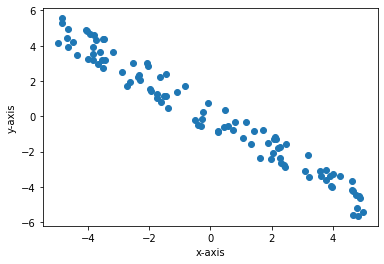

In [1]:
import numpy as np
from matplotlib import pyplot as plt
n=100
m=np.random.uniform(-1,1)
#print(m)
x=np.random.uniform(-5,5,n)
#print(x)
c=np.random.uniform(-1,1,n)
#print(c)
y=m*x+c
#print(y)
plt.scatter(x,y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

## Linear Regression using scikit-learn

In [2]:
from sklearn.linear_model import LinearRegression
x1=x.reshape(-1,1)
line=LinearRegression().fit(x1,y)
print(line)
print(line.score(x1,y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.9621478408595598


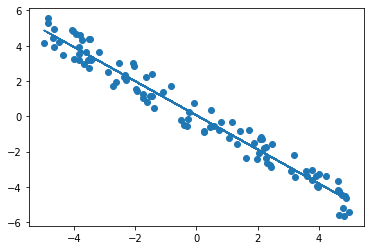

4.836983206177466


In [4]:
plt.plot(x,line.predict(x1))
plt.scatter(x,y)
plt.show()

## 1. Batch Gradient Descent
### Loss Function

$$J((w,b))=\frac 1N\sum_{i=1}^N(y_p-y_i)^2=\frac 1N\sum_{i=1}^N((wx_i+b)-y_i)^2;\\ N=\text{Batch Size / No. of Data Points.}$$

### Updation
$$w:=w-\alpha\Delta w;\;\Delta w=\frac{\partial J}{\partial w}=\frac 2 N\sum_{i=1}^Nx_i(y_p-y_i);\\
b:=b-\alpha\Delta b;\;\Delta b=\frac{\partial J}{\partial b}=\frac 2 N\sum_{i=1}^N(y_p-y_i).$$

-0.9644087008183597 0.059734820784466874 
 No. of iterations = 642


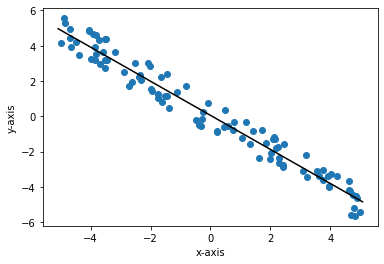

MSE in Weights, del w= 1.1948170063891262e-07 
 MSE in Bias, del b= 9.991984499229111e-06


In [58]:
#Batch Gradient Descent
w=10 
b=2
alpha=0.01
flag=0
delw=0
delb=0
n_iter=0
while flag!=1:
  """
  for i in range(n):
    delw+=x[i]*((w*x[i]+b)-y[i])
    delb+=((w*x[i]+b)-y[i])
  delw*=(2/n)
  delb*=(2/n)
  """
  delw=(2/n)*np.sum(x*((w*x+b)-y))
  delb=(2/n)*np.sum((w*x+b)-y)
  w-=alpha*delw
  b-=alpha*delb
  if abs(delw)<0.0001 and abs(delb)<0.00001:
    flag=1
  n_iter+=1
print(w,b,'\n','No. of iterations =',n_iter)
x_plt=np.array([min(x)-0.1,max(x)+0.1])
y_plt1=w*x_plt+b
plt.plot(x_plt,y_plt1,c='k')
plt.scatter(x,y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()
print("MSE in Weights, del w=",delw,'\n',"MSE in Bias, del b=",delb)

## 2. Minibatch Gradient Descent
### Loss Function
$$J(w,b)=\frac{1}{N_\text{Minibatch}}\sum_{i=1}^{N_\text{Minibatch}}((wx_i+b)-y_i)^2;\\ N=\text{Minibatch Size / No. of Data Points in a minibatch.}$$
###Updation
$$w:=w-\alpha\Delta w;\;\Delta w=\frac{\partial J}{\partial w}=\frac 2 {N_\text{Minibatch}}\sum_{i=1}^{N_\text{Minibatch}}x_i(y_p-y_i);\\
b:=b-\alpha\Delta b;\;\Delta b=\frac{\partial J}{\partial b}=\frac 2 {N_\text{Minibatch}}\sum_{i=1}^{N_\text{Minibatch}}(y_p-y_i).$$

-1.0584584466163744 -0.3899690300981997 
 No. of iterations = 5908


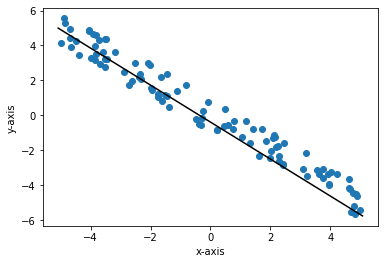

MSE in Weights, del w= 8.087276042223479e-07 
 MSE in Bias, del b= 9.999281267201177e-06


In [59]:
#Minibatch Gradient Descent
w=10 
b=2
alpha=0.01
flag=0
delw=0
delb=0
n_iter=i=0
inc=n//10 #thus chosen here as n=100 but might generalise this line
while flag!=1:
  """
  for i in range(n):
    delw+=x[i]*((w*x[i]+b)-y[i])
    delb+=((w*x[i]+b)-y[i])
  delw*=(2/n)
  delb*=(2/n)
  """
  delw=(2/n)*np.sum(x[i:i+inc]*((w*x[i:i+inc]+b)-y[i:i+inc]))
  delb=(2/n)*np.sum((w*x[i:i+inc]+b)-y[i:i+inc])
  w-=alpha*delw
  b-=alpha*delb
  #print(delw,delb)
  if abs(delw)<0.0001 and abs(delb)<0.00001:
    flag=1
  n_iter+=1
print(w,b,'\n','No. of iterations =',n_iter)
x_plt=np.array([min(x)-0.1,max(x)+0.1])
y_plt2=w*x_plt+b
plt.plot(x_plt,y_plt2,c='k')
plt.scatter(x,y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()
print("MSE in Weights, del w=",delw,'\n',"MSE in Bias, del b=",delb)

## 3. Stochastic Gradient Descent
### Loss Function
For each data point,
$$J(w,b)=((wx+b)-y)^2;$$
###Updation
$$w:=w-\alpha\Delta w;\;\Delta w=\frac{\partial J}{\partial w}=2\times x(y_p-y);\\
b:=b-\alpha\Delta b;\;\Delta b=\frac{\partial J}{\partial b}=2\times(y_p-y).$$

-1.1042795705452575 -0.2957035609227721 
 No. of iterations = 102


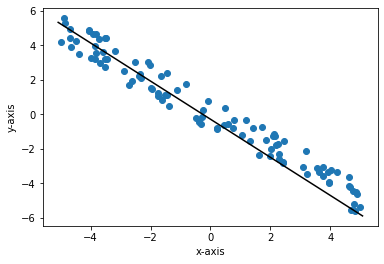

In [64]:
#Stochastic Gradient Descent
w=10 
b=2
alpha=0.01
flag=0
delw=0
delb=0
n_iter=i=0
inc=n//10 #thus chosen here as n=100 but might generalise this line
while flag!=1:
  """
  for i in range(n):
    delw+=x[i]*((w*x[i]+b)-y[i])
    delb+=((w*x[i]+b)-y[i])
  delw*=(2/n)
  delb*=(2/n)
  """
  delw=2*(x[i]*((w*x[i]+b)-y[i]))
  delb=2*((w*x[i]+b)-y[i])
  w-=alpha*delw
  b-=alpha*delb
  #print(delw,delb)
  if abs(delw)<0.0001 and abs(delb)<0.00001 and n_iter>n:
    flag=1
  n_iter+=1
print(w,b,'\n','No. of iterations =',n_iter)
x_plt=np.array([min(x)-0.1,max(x)+0.1])
y_plt3=w*x_plt+b
plt.plot(x_plt,y_plt3,c='k')
plt.scatter(x,y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()
#print("MSE in Weights, del w=",delw,'\n',"MSE in Bias, del b=",delb)

##Some Observations
* Batch Gradient Descent gave the best accuracy possible (i.e. least MSE in terms of weights and biases), and produced similar results as produced by scikit-learn's Linear Regression;
* Stochastic Gradient Descent worked really fast to converge (or get close to) the minimum of the loss function, (note: SGD was forced to complete at least one epoch before being allowed to terminate);
* Minibatch Gradient Descent took an large number of iterations in comparison to SGD and Batch GD to terminate and the quality of the results was not near that of Batch GD.

(**Note:** These observations were made after repeated runs of each algorithm and my code/implementations might not be the best way of going about it, so take this with a grain of salt.)